In [8]:
!cd .. && mkdir build
!cd ../build/ && rm -rf *
!cd ../build && cmake \
  -DPYTHON_EXECUTABLE="$(which python)" \
  -DCMAKE_BUILD_TYPE=Release ..
!cd ../build && make install

mkdir: cannot create directory ‘build’: File exists
-- The C compiler identification is GNU 9.3.0
-- The CXX compiler identification is GNU 9.3.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
Release mode
-- Found PythonInterp: /home/bruno/.virtualenvs/metodos-tp3/bin/python (found version "3.8.2") 
-- Found PythonLibs: /usr/lib/x86_64-linux-gnu/libpython3.8.so
-- pybind11 v2.2.4
-- Performing Test HAS_FLTO
-- Performing Test HAS_FLTO - Success
-- LTO enabled
CMAKE_INSTALL_PREFIX=/home/bruno/Documents/UBA/Metodos_númericos/metodos-tp3
-- Co

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Verifico la correcta instalación. Si no falla el import está OK
!pwd
!python --version
import metnum


/Users/ecerdeira/git/metodos-tp3/notebooks
Python 2.7.16


ImportError: dlopen(/Users/ecerdeira/git/metodos-tp3/notebooks/metnum.so, 2): Symbol not found: __PyThreadState_Current
  Referenced from: /Users/ecerdeira/git/metodos-tp3/notebooks/metnum.so
  Expected in: flat namespace
 in /Users/ecerdeira/git/metodos-tp3/notebooks/metnum.so

In [10]:
df = pd.read_csv('../data/train.csv')

TypeError: 'Index' object is not callable

In [6]:
df = df[df['ciudad']=='Mérida'].dropna()

In [118]:
x = df[['metroscubiertos', "piscina", "usosmultiples", "gimnasio", "escuelascercanas", "centroscomercialescercanos", "habitaciones", "garages", "banos"]].values

In [119]:
y = df['precio'].values

In [120]:
x = x.reshape(len(x),9)
y = y.reshape(len(y),1)

In [121]:
print(x.shape)
print(y.shape)

(518, 9)
(518, 1)


In [122]:
print(np.linalg.inv(x.T @ x) @ (x.T @ y))

[[   6447.5045302 ]
 [ 430382.04674583]
 [ 395911.16564601]
 [ 530647.71596304]
 [-224941.39947838]
 [ 233989.26744233]
 [-172167.56294647]
 [  68999.81676556]
 [ 256260.91704228]]


In [123]:
from sklearn.linear_model import LinearRegression

"""
Reemplazar por nuestra implementación 
"""

#linear_regressor = LinearRegression()
linear_regressor = metnum.LinearRegression() # CHEQUEADO

linear_regressor.fit(x,y)

In [124]:
df['prediction'] = linear_regressor.predict(x)
prediction = linear_regressor.predict(x)

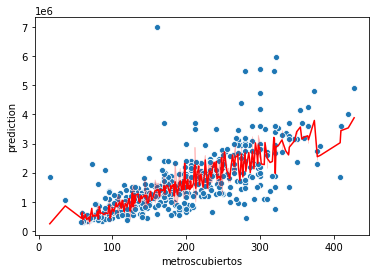

In [125]:
sns.scatterplot(data=df, x='metroscubiertos', y='precio')
sns.lineplot(data=df, x='metroscubiertos', y='prediction', color='red')


In [57]:
error = metnum.LossFunctions()

print("MSE: %f" % (error.meanSquareError(y, prediction)))
print("MAE: %f" % (error.meanAbsoluteError(y, prediction)))
print("RMSE: %f" % (error.rootMeanSquareError(y, prediction)))
print("RMSLE: %f" % (error.rootMeanSquareLogError(y, prediction)))

MSE: 443367086054.402832
MAE: 433978.625108
RMSE: 665858.157609
RMSLE: 0.405806


In [126]:
error = metnum.LossFunctions()

print("MSE: %f" % (error.meanSquareError(y, prediction)))
print("MAE: %f" % (error.meanAbsoluteError(y, prediction)))
print("RMSE: %f" % (error.rootMeanSquareError(y, prediction)))
print("RMSLE: %f" % (error.rootMeanSquareLogError(y, prediction)))

MSE: 331702771217.458313
MAE: 371943.982063
RMSE: 575936.429841
RMSLE: 0.354096


In [107]:
import math

calculo = ((np.log(y+1)-np.log(prediction+1))**2)
for i in range(len(calculo)):
    if math.isnan(calculo[i]):
        print(i)

229


/Users/ecerdeira/.virtualenvs/tp3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
